# 군집 (Clustering)

## 분류 vs 군집

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X[y == 0, 2], X[y == 0, 3]

(array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]))

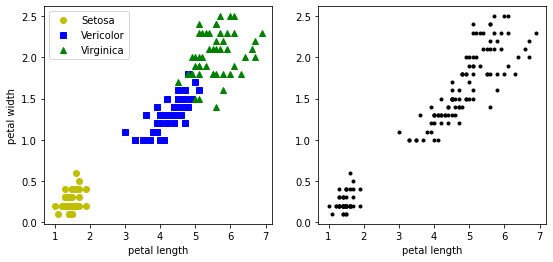

In [4]:
plt.figure(figsize=(9, 4))

# 분류
plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], 'yo', label= "Setosa")
plt.plot(X[y == 1, 2], X[y == 1, 3], 'bs', label = "Vericolor")
plt.plot(X[y == 2, 2], X[y == 2, 3], 'g^', label = "Virginica")

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

# 군집
plt.subplot(122)
plt.plot(X[:, 2], X[:, 3], 'k.')
plt.xlabel('petal length')
plt.show()

## K- 평균

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state=7)

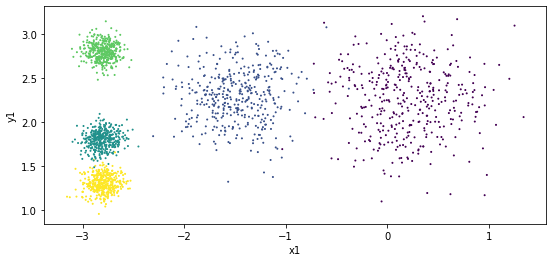

In [ ]:
# 데이터 시각화
plt.figure(figsize=(9, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("x1")
plt.ylabel("y1")
plt.show()

### KMeans 로 훈련과 예측

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X) # 훈련 : KMeans 알고리즘에 의해 클러스터를 만듬

KMeans(n_clusters=5, random_state=42)

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [ ]:
kmeans.labels_ # 군집(클러스터링)된 레이블

array([4, 0, 1, ..., 2, 1, 0])

In [ ]:
y_pred.shape, kmeans.labels_.shape

((2000,), (2000,))

In [ ]:
(y_pred != kmeans.labels_).sum()

0

In [ ]:
kmeans.cluster_centers_ # 5개의 센트로이드 (즉, 클러스터의 중심)

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
# 데이터 시각화 코드에 클러스터 중심에 triangle로 표시하는 코드 추가
def plot_cluster(X, y, cluster_centers, cluster_label):
    plt.figure(figsize=(9, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c= cluster_label, 
                marker='^', linewidths=2, edgecolors='k', s=100)

    plt.xlabel("x1")
    plt.ylabel("y1")
    plt.show()

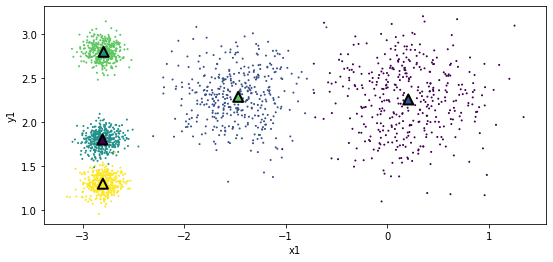

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_label = np.unique(kmeans.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label)    

In [ ]:
# 새로운 데이터에 대한 예측
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### K-평균 알고리즘

K-평균 알고리즘은 가장 빠르고 가장 간단한 군집 알고리즘 중 하나
* 먼저 $k$ 개의 센트로이드를 랜덤하게 초기화: 데이터셋에서 $k$ 개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓기
* 수렴할 때까지 다음을 반복(즉, 센트로이드가 더이상 이동하지 않을 때까지):
    * 각 샘플을 가장 가까운 센트로이드에 할당
    * 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트

#### step 1

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', max_iter=1, random_state=0)
kmeans_iter1.fit(X)

KMeans(algorithm='full', init='random', max_iter=1, n_clusters=5, n_init=1,
       random_state=0)

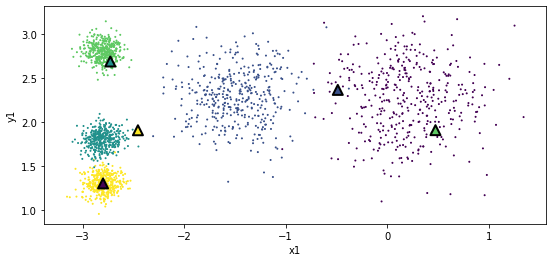

In [ ]:
cluster_centers = kmeans_iter1.cluster_centers_
cluster_label = np.unique(kmeans_iter1.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label)   

#### Step 2

In [ ]:
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', max_iter=2, random_state=0)
kmeans_iter2.fit(X)

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=5, n_init=1,
       random_state=0)

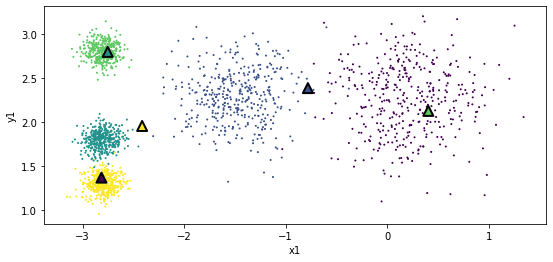

In [ ]:
cluster_centers = kmeans_iter2.cluster_centers_
cluster_label = np.unique(kmeans_iter2.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

#### Step 3

In [ ]:
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', max_iter=3, random_state=0)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

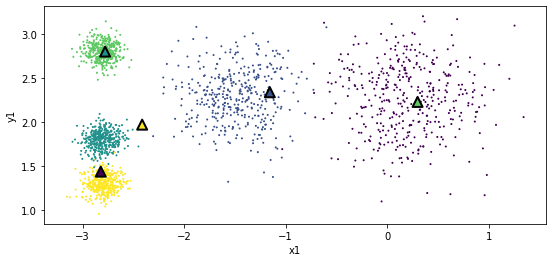

In [ ]:
cluster_centers = kmeans_iter3.cluster_centers_
cluster_label = np.unique(kmeans_iter3.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

#### Step 4

In [ ]:
kmeans_iter4 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', max_iter=4, random_state=0)
kmeans_iter4.fit(X)

KMeans(algorithm='full', init='random', max_iter=4, n_clusters=5, n_init=1,
       random_state=0)

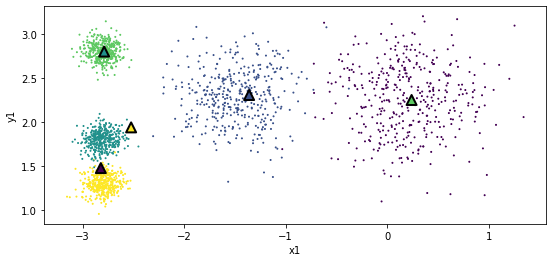

In [ ]:
cluster_centers = kmeans_iter4.cluster_centers_
cluster_label = np.unique(kmeans_iter4.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

#### Step 5

In [ ]:
kmeans_iter5 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', max_iter=5, random_state=0)
kmeans_iter5.fit(X)

KMeans(algorithm='full', init='random', max_iter=5, n_clusters=5, n_init=1,
       random_state=0)

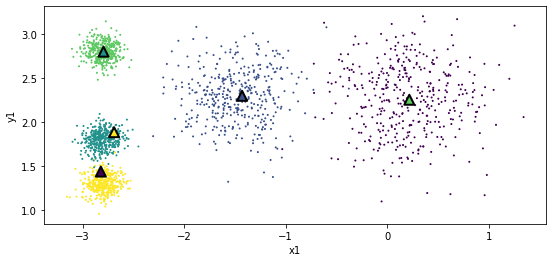

In [ ]:
cluster_centers = kmeans_iter5.cluster_centers_
cluster_label = np.unique(kmeans_iter5.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

### K-평균의 변동성

센트로이드 초기화에 따른 다른 결과

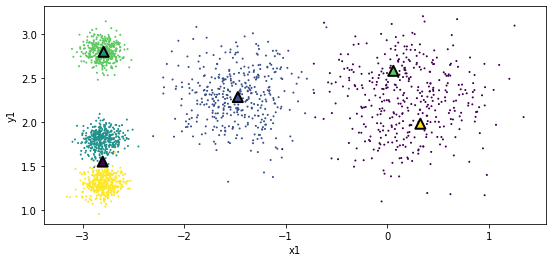

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', random_state=2)
kmeans_rnd_init1.fit(X)

cluster_centers = kmeans_rnd_init1.cluster_centers_
cluster_label = np.unique(kmeans_rnd_init1.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

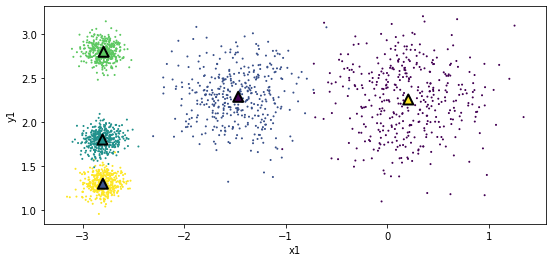

In [ ]:
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                       algorithm='full', random_state=5)
kmeans_rnd_init2.fit(X)

cluster_centers = kmeans_rnd_init2.cluster_centers_
cluster_label = np.unique(kmeans_rnd_init2.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

### 이너셔(inertia)
- 샘플과 가장 가까운 센트로이드와의 거리의 제곱의 합
- 각 군집이 센트로이드에 얼마나 가까이 모여있는가를 측정
- 따라서 이너셔(관성)가 작을수록 군집이 잘 되었다고 평가

In [ ]:
kmeans_rnd_init1.inertia_

219.43539442771404

In [ ]:
kmeans_rnd_init2.inertia_

211.59853725816828

In [ ]:
# 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합 ("직접 구해보기")
X_dist = kmeans_rnd_init1.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans_rnd_init1.labels_]**2)

219.43539442771527

In [ ]:
kmeans_rnd_init1.score(X) # 사이킷런 score() : 항상  큰 값이 좋은것 규칙

-219.43539442771396

### 다중 초기화
위의 변동성 이슈 해결방법은
k-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러번 실행하고 "가장 작은 이너셔"를 만드는 솔루션을 선택

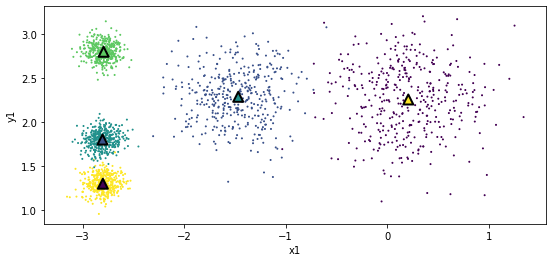

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                       algorithm='full', random_state=2)
kmeans_rnd_10_inits.fit(X)

cluster_centers = kmeans_rnd_10_inits.cluster_centers_
cluster_label = np.unique(kmeans_rnd_10_inits.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

### 최적의 클러스터 개수 찾기

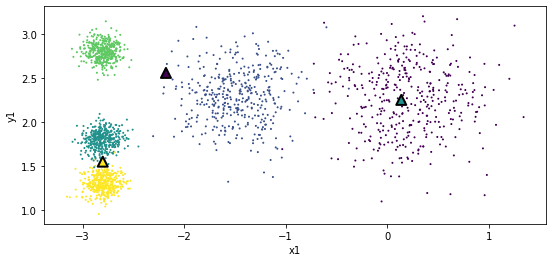

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k3.fit(X)

cluster_centers = kmeans_k3.cluster_centers_
cluster_label = np.unique(kmeans_k3.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

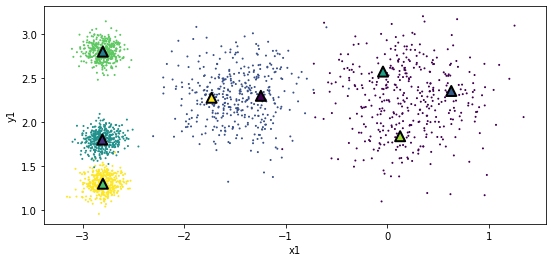

In [ ]:
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k8.fit(X)

cluster_centers = kmeans_k8.cluster_centers_
cluster_label = np.unique(kmeans_k8.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

In [ ]:
kmeans_k3.inertia_

653.2167190021557

In [ ]:
kmeans_k8.inertia_

119.1198341610289

* $k$가 증가할수록 이너셔가 줄어들기 때문에 단순히 어녀서가 작은 k를 선택할 수 없음
* 실제 클러스터가 많을수록 샘플은 인접한 센트로이드에 더 가깝고, 이너셔가 더 작음

#### (1) 이너셔와 k이 관계

In [ ]:
k_means_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in k_means_per_k]

Text(0, 0.5, 'Inertia')

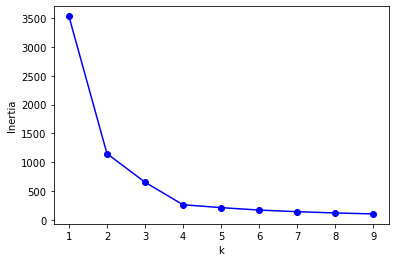

In [ ]:
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")

* $k$=4가 좋은 선택으로 보여짐
* 이 값보다 클러스터가 작으면 나쁘고, 더 많으면 크게 도움이 되지 않음

#### (2) 실루엣 점수 (또다른 방법)

* 모든 샘플에 대한 실루엣 계수의 평균인 실루엣 점수
* 한 샘플의 실루엣 계수는 (b-a)/max(a,b)
* a는 같은 클러스터에 있는 다른 샘플까지의 평균거리 (클러스터 내부 평균 거리)
* b는 가장 가까운 클러스터까지의 평균 거리
* 실루엣 계수는 -1 ~ +1 사이 값을 가짐
* +1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미
* 0에 가까우면 샘플이 클러스터 경계에 가깝다는 의미
* -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을 가능성


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [ ]:
k_means_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in k_means_per_k[1:]]

Text(0, 0.5, 'Silhouette score')

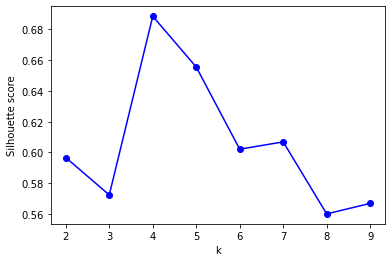

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")

* $k$ = 4 가 매우 좋은 선택이지만
* $k$ = 5 도 괜찮음

#### 실루엣 다이어그램 군집수
* Selecting the number of clusters with silhouette analysis on KMeans clustering
* https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=selecting%20number%20cluster

* 실루엣 다이어그램은 군집별로 실루엣 계수들을 모아놓은 그래프
* 군집별로 실루엣 계수를 내림차순으로 정렬하면 칼날 모양이 형성
* 칼날 두께 : 군집에 포함된 샘플 수
* 칼날 길이 : 군집에 포함된 각 샘플의 실루엣 계수
* 빨강 파선 : 실루엣 점수, 즉 실루엣 계수의 평균값
* 좋은 군집 모델은 대부분의 칼날이 칼날이 빨간 파선보다 길어야하며,
* 칼날의 두께가 서로 비슷해야 함
* 군집별 크기가 비슷한 $k$=5가 좋은 모델로 보여짐

For n_clusters = 2 The average silhouette_score is : 0.5966442557582528
For n_clusters = 3 The average silhouette_score is : 0.5723900247411775
For n_clusters = 4 The average silhouette_score is : 0.688531617595759
For n_clusters = 5 The average silhouette_score is : 0.655517642572828
For n_clusters = 6 The average silhouette_score is : 0.6021101618281359


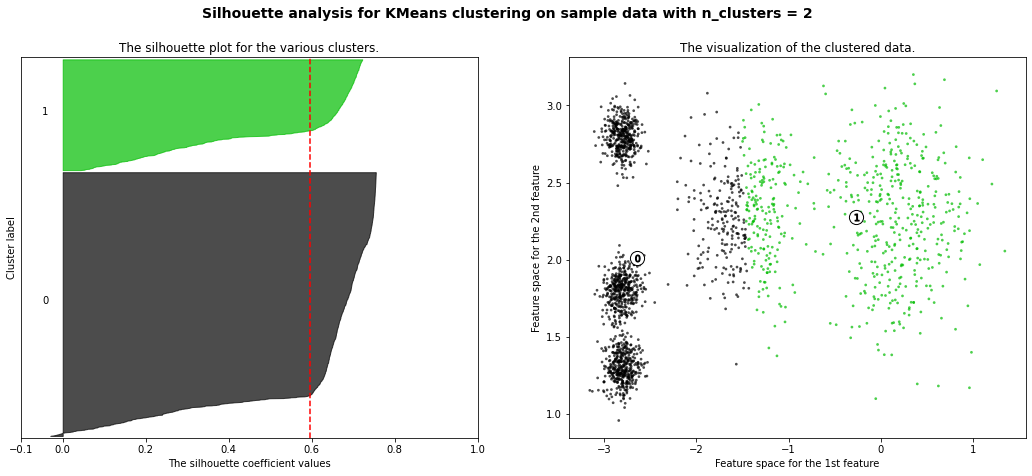

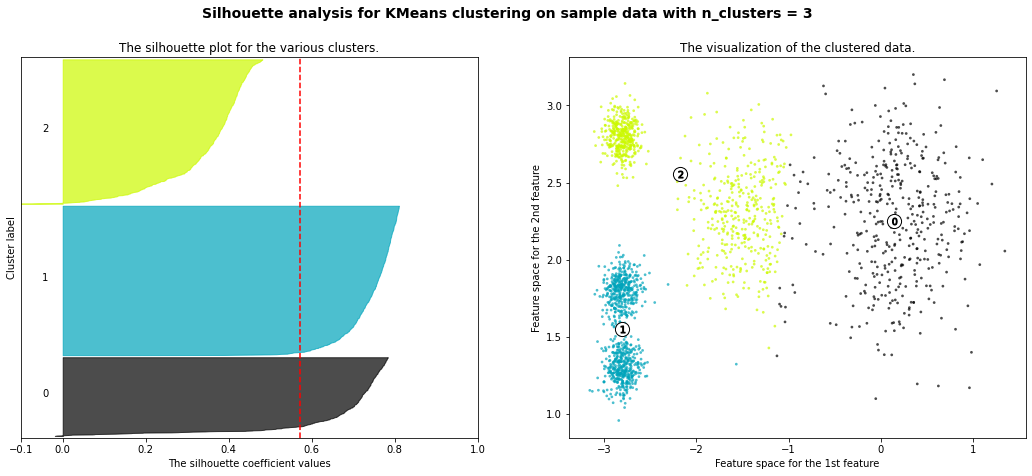

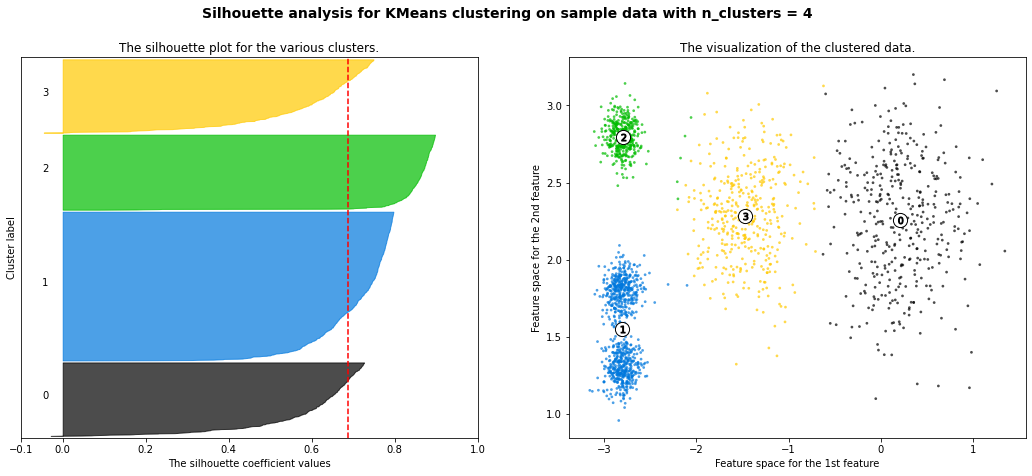

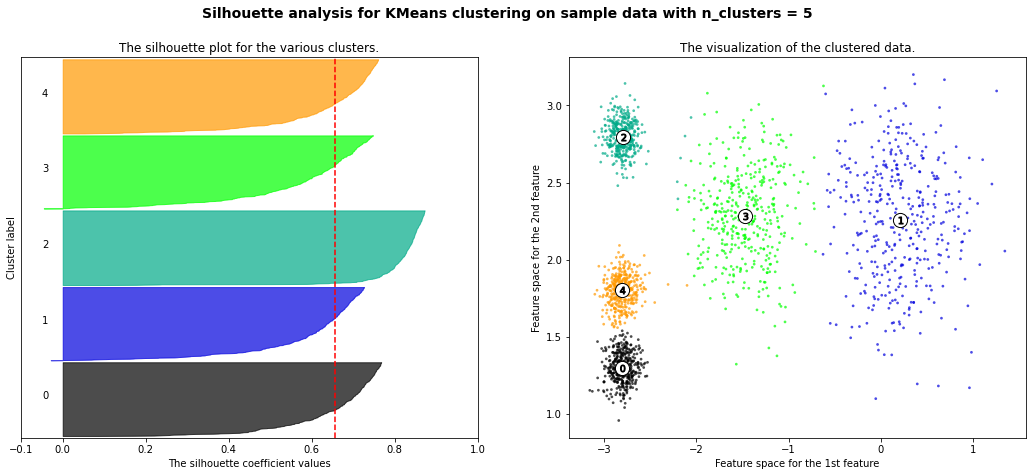

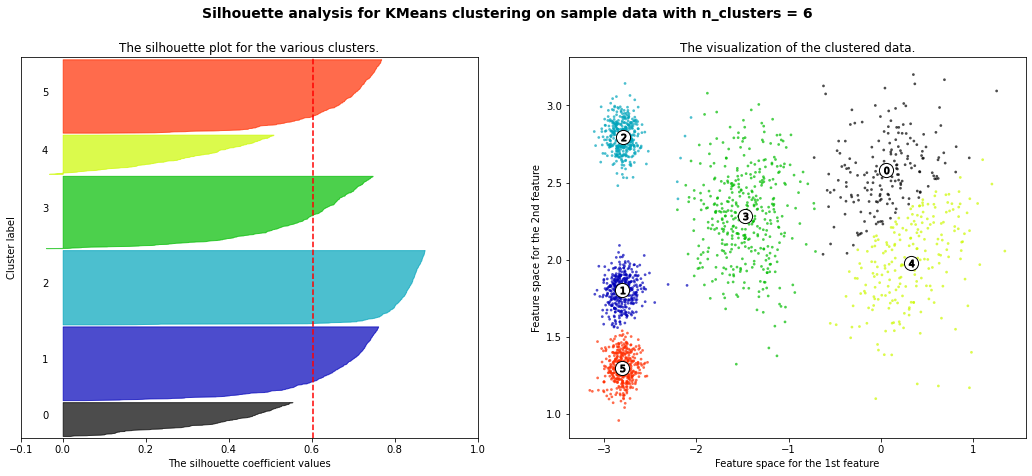

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Modify our data
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state=7)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### K-평균의 한계
* 최적의 모델을 구하기 위해 여러번 학습해야 함
* 군집수를 미리 지정해야 함
* 군집의 크기 밀집도가 다르거나, 원형이 아닐 경우 잘 작동하지 않음

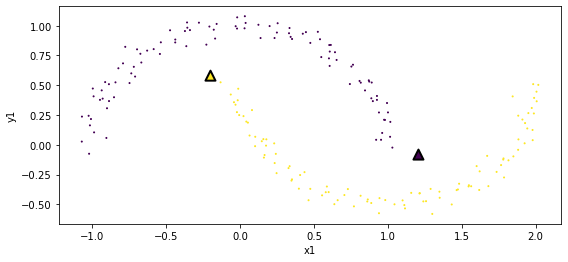

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_label = np.unique(kmeans.labels_)   

plot_cluster(X, y, cluster_centers, cluster_label) 

In [ ]:
# 데이터 시각화 코드에 클러스터 중심에 triangle로 표시하는 코드 추가
# 예측까지 포함하느 코드 추가
def plot_cluster_with_predict(X, y, cluster_centers, cluster_label, predict):
    plt.figure(figsize=(9, 4))
    
    # 1. 원본데이터
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

    # 2. 클러스터의 중심
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c= cluster_label, 
                marker='^', linewidths=2, edgecolors='k', s=100)
    
    # 3. 예측 표시
    plt.scatter(X[:, 0], X[:, 1], c=predict, s=40, edgecolors='k')

    plt.xlabel("x1")
    plt.ylabel("y1")
    plt.show()

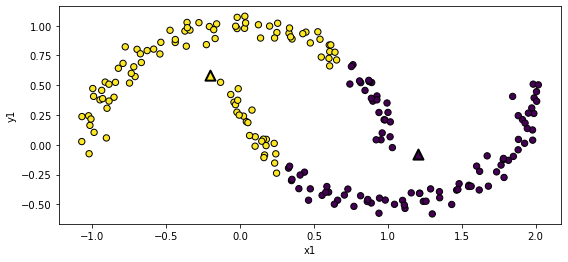

In [ ]:
y_pred = kmeans.predict(X)
plot_cluster_with_predict(X, y, cluster_centers, cluster_label, y_pred) 